# TasteRank: Personalized Image Search and Recommendation
Nicholas Asker  (nga2120@columbia.edu)  
Repository: https://github.com/N-G-Asker/TasteRank

Skip ahead to the [Run Experiment](#run-experiment) section if you wish to use the same generated lists of preferences, descriptors, and match classes that I used for experiments. These are available in the GitHub repository in the folder `setup` $-$ download the three `json` files there, then upload to your Colab workspace to execute the experiment.

Otherwise, continue to [Experimental Setup](#experimental-setup) to generate your own lists, using the same setup methodology as me.

The whole notebook is not intended to be run all at once, but rather in parts, since the runtime required in each section differs.

## Experimental Setup

__Warning__: For runtime, use the T4 GPU __with high-memory toggled on__ to avoid crashing your Colab instance due to out-of-memory errors.

### Function Library
Get the project code for generating with the LLM and processing outputs.

In [ ]:
!git clone https://github.com/N-G-Asker/TasteRank.git
# copy project code into current directory for easier access/imports
!cp -av /content/TasteRank/* /content/
!pip --quiet install -r requirements.txt

Cloning into 'TasteRank'...
remote: Enumerating objects: 48, done.
remote: Counting objects: 100% (48/48), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 48 (delta 18), reused 36 (delta 10), pack-reused 0
Receiving objects: 100% (48/48), 1.72 MiB | 32.10 MiB/s, done.
Resolving deltas: 100% (18/18), done.
'/content/TasteRank/investigate_tests.py' -> '/content/investigate_tests.py'
'/content/TasteRank/README.md' -> '/content/README.md'
'/content/TasteRank/requirements.txt' -> '/content/requirements.txt'
'/content/TasteRank/results' -> '/content/results'
'/content/TasteRank/results/ALL_264_hybrid_test_results_2024-04-20_04-10-50.json' -> '/content/results/ALL_264_hybrid_test_results_2024-04-20_04-10-50.json'
'/content/TasteRank/results/ALL_264_non-hybrid_results_2024-04-20_21-53-31.json' -> '/content/results/ALL_264_non-hybrid_results_2024-04-20_21-53-31.json'
'/content/TasteRank/run_experiment.py' -> '/content/run_experiment.py'
'/content/TasteRank/setup' -> '/conte

### Load the LLM
To use the defualt LLM model model_id="mistralai/Mistral-7B-v0.1", which became gated on HuggingFace part-way through my project, use the following resources to get access and add a secret token to your Colab session:
- https://huggingface.co/docs/hub/security-tokens
- https://huggingface.co/docs/hub/models-gated
- Instructions on the Secrets tab (key button) in Colab

The project codebase assumes you have named the secret in your Google Colab userdata 'HF' (short for HuggingFace).

In [ ]:
from set_up_experiment import LLM

# LOAD THE LLM
llm = LLM()

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/25.1k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/9.94G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/4.54G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/967 [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/493k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.80M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/72.0 [00:00<?, ?B/s]

### Generate Pool of Target Preferences

In [ ]:
# For 20 iterations, prompt the LLM for preferences and collect the responses
# Output is expected to contain around 300 generated items (number will vary)
# Estimaed runtime: 5 minutes
preferences = llm.get_all_responses(mode="preferences", colab_download=True)

# # If you instead want to load a previously-generated output instead of generating again,
# # uncomment the below two lines but comment out the top line
# preferences_file = "preferences_responses_2024-04-16_04-46-44.json"
# preferences = load_preferences(preferences_file)

25.0% completed
50.0% completed
75.0% completed
100.0% completed
Saving responses to JSON file preferences_responses_2024-05-05_17-23-38.json...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# view the preferences
for i, item in enumerate(preferences):
    print(f"{i}.", preferences[i])

0. only eat one specific fruit (for example apples)
1. only eat one specific vegetable (for example celery)
2. only eat one specific cuisine (for example mexican)
3. avoid meat
4. avoid fruit
5. avoid vegetables
6. avoid spicy dishes
7. avoid saucy dishes
8. avoid fried food
9. avoid salty food
10. avoid sugary foods
11. try something from their country
12. get a dessert toppings buffet
13. get spicy food
14. have something that reminds them of their childhood
15. get something that has been on the menu a long time
16. find a dish that includes potatoes
17. try something that smells like an ocean
18. get a baked meal
19. get something that has been pickled
20. have a sweet and salty dessert
21. try something made with an animal product
22. get a dish that comes with a sauce
23. get a drink that has been infused with other flavor
24. have a dessert platter
25. have a sweet dessert
26. get something from another country
27. eat raw sushi
28. eat an orange
29. eat dessert
30. diet
31. dri


### Determine Preference-Matching Classes

In [ ]:
# Get all matching classes, one set per preference
# Estimated runtime when preferences contains around 300 items: 120 minutes
matching_classes = llm.get_matching_classes(preferences, colab_download=True)

# # If you instead want to load a previously-generated output instead of generating again,
# # uncomment the below two lines but comment out the top line
# matching_classes_file = "matching_classes_responses_2024-04-17_04-29-00.json"
# matching_classes = load_responses(matching_classes_file)

100%|██████████| 277/277 [1:52:24<00:00, 24.35s/it]

Saving responses to JSON file matching_classes_responses_2024-05-05_19-19-22.json...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from set_up_experiment import show_responses
# View the generated matching classes
show_responses(matching_classes)

Streaming output truncated to the last 5000 lines.
mussels
sashimi
scallops
seaweed_salad
sushi
tuna_tartare



try something new and exciting
baklava
beef_carpaccio
beef_tartare
beet_salad
beignets
bibimbap
breakfast_burrito
bruschetta
ceviche
chicken_curry
chicken_wings
chocolate_mousse
churros
cup_cakes
dumplings
edamame
eggs_benedict
escargots
falafel
filet_mignon
foie_gras
fried_calamari
gnocchi
grilled_salmon
guacamole
gyoza
hot_and_sour_soup
huevos_rancheros
hummus
lobster_bisque
lobster_roll_sandwich
macarons
miso_soup
mussels
oysters
pad_thai
paella
panna_cotta
peking_duck
pho
red_velvet_cake
risotto
samosa
sashimi
scallops
seaweed_salad
shrimp_and_grits
spring_rolls
strawberry_shortcake
sushi
tacos
takoyaki
tuna_tartare
waffles



be adventurous
baby_back_ribs
baklava
beef_carpaccio
beef_tartare
beet_salad
bibimbap
breakfast_burrito
bruschetta
carrot_cake
ceviche
cheese_plate
chicken_curry
chicken_wings
chocolate_mousse
churros
croque_madame
dumplings
edamame
eggs_benedict
es

### Generate Descriptors

In [ ]:
from set_up_experiment import filter_preferences
preferences = filter_preferences(preferences, matching_classes, colab_download=True)

len(preferences)=231
Saving responses to JSON file preferences_filtered_2024-05-05_19-19-29.json...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# # uncomment below two lines to load (already filtered) preferences from a
# # previously saved file
# preferences_file = "preferences_filtered_2024-04-18_21-52-49.json"
# preferences = load_preferences(preferences_file)

# Get a descriptors list corresponding to each preference
# Estimated Runtime for filtered preferences list of length ~300 items: 22 minutes
descriptors = llm.get_all_responses(preferences, mode="descriptors", colab_download=True)

# # If you instead want to load a previously-generated output instead of generating again,
# # uncomment the below two lines but comment out the line above before running.
# descriptors_file = "descriptors_responses_2024-04-17_18-17-19.json"
# descriptors = load_responses(descriptors_file)

100%|██████████| 231/231 [16:36<00:00,  4.31s/it]

Saving responses to JSON file descriptors_responses_2024-05-05_19-36-13.json...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from set_up_experiment import show_responses
# view generated descriptors
show_responses(descriptors)




avoid meat
Vegetable main dishes
Veggie subs
Wholesome vegetable side dish
Meatless dishes for omnivores



avoid spicy dishes
Mild appetizers
Mild soups & salads
Mild main dishes
Mild desserts
Mild drinks



avoid saucy dishes
Meats and seafood, cooked dry
Greens and grains, served dry



avoid fried food
Boiled meats
Fresh produce
Baked goods
Stir-fry dishes
Tortilla-wrapped food



avoid salty food
Fresh produce
Mineral-rich foods
Unseasoned foods
Homemade fare



avoid sugary foods
Baked goods
Sweet snacks
Sips for desserts



try something from their country
Authentic
Homemade
Family-owned
Street food
Artisan



get a dessert toppings buffet
Creamy yogurts
Fruity toppings
Ice cream
Baked treats



get spicy food
Mexican
Indian
Southeast Asian
Korean
Japanese
Sichuanese
Hunan
Thai
Ethiopian
Cajun
Hot and spicy



have something that reminds them of their childhood
Breakfast cereals
Soups and stews
Cake and cookies
Homemade dinners



get something that has been on the menu a lon

__Warning__: Be sure to save all JSON outputs to your local machine if they were not automatically downloaded.

## Run Experiment

__Note__: You must be connected to a T4 GPU runtime (or an alternative GPU runitme with more memory).

It is recommended to restart the session (Runtime > Restart Session) if you are coming from the above section [Experimental Setup](#experimental-setup), as GPU memory will be near full.

### Function Library
Get the project code for running the experiment.

In [5]:
!git clone https://github.com/N-G-Asker/TasteRank.git
# copy project code into current directory for easier access/imports
!cp -av /content/TasteRank/* /content/
!cp -av /content/setup/* /content/
!pip --quiet install -r requirements.txt
!pip --quiet install git+https://github.com/openai/CLIP.git

fatal: destination path 'TasteRank' already exists and is not an empty directory.
'/content/TasteRank/README.md' -> '/content/README.md'
'/content/TasteRank/requirements.txt' -> '/content/requirements.txt'
'/content/TasteRank/results/ALL_264_hybrid_test_results_2024-04-20_04-10-50.json' -> '/content/results/ALL_264_hybrid_test_results_2024-04-20_04-10-50.json'
'/content/TasteRank/results/ALL_264_non-hybrid_results_2024-04-20_21-53-31.json' -> '/content/results/ALL_264_non-hybrid_results_2024-04-20_21-53-31.json'
'/content/TasteRank/run_experiment.py' -> '/content/run_experiment.py'
'/content/TasteRank/setup/descriptors_responses_2024-04-19_05-43-23.json' -> '/content/setup/descriptors_responses_2024-04-19_05-43-23.json'
'/content/TasteRank/setup/matching_classes_responses_2024-04-17_04-29-00.json' -> '/content/setup/matching_classes_responses_2024-04-17_04-29-00.json'
'/content/TasteRank/setup/preferences_filtered_2024-04-18_21-52-49.json' -> '/content/setup/preferences_filtered_2024-0

### Load CLIP

In [2]:
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"

print(f'Using device: {device}')

Using device: cuda


In [3]:
import clip
model, preprocess = clip.load("ViT-B/32", device=device)

100%|███████████████████████████████████████| 338M/338M [00:12<00:00, 29.1MiB/s]


### Load Food101 Dataset
Downloading and extracting the dataset takes ~5 minutes when running this cell for the first time. Future runs of this cell on the same runtime (after restarting the session, for example) happen nearly instantly, since the data has already been downloaded to the machine instance.

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms
from math import floor
from torch.utils.data import Dataset

device = "cuda" if torch.cuda.is_available() else "cpu"

torch.manual_seed(0)

g_cpu = torch.Generator()
g_cpu.manual_seed(1)

# Undo CLIP's normalization, for displaying images
# See https://github.com/openai/ ...
# CLIP/blob/a1d071733d7111c9c014f024669f959182114e33/clip/clip.py#L85C9-L85C92
unnormalize = transforms.Normalize(
    (-0.48145466/0.26862954, -0.4578275/0.26130258, -0.40821073/0.27577711),
    (1/0.26862954, 1/0.26130258, 1/0.27577711)
    )

def imshow(img):
    img = unnormalize(img)
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

transform = preprocess # from loading CLIP earlier

batch_size = 1000

# Get the indices for the images as they are in the underlying dataset. Source:
# https://discuss.pytorch.org/t/how-to-retrieve-the-sample-indices-of-a-mini-batch/7948/12
class MyDataset(Dataset):
    def __init__(self):
        self.food101 = torchvision.datasets.Food101(root='./data', split="test",
                                       download=True, transform=transform)

    def __getitem__(self, index):
        data, target = self.food101[index]

        # Your transformations here (or set it in CIFAR10)

        return data, target, index

    def __len__(self):
        return len(self.food101)

testset = MyDataset()

# Create a smaller testset for more manageable experimentation
frac_of_test = 0.20
test_size = floor(frac_of_test * len(testset))

testset_sampler = torch.utils.data.RandomSampler(testset, replacement=False,
                                        num_samples=test_size,
                                        generator=g_cpu)

testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         sampler = testset_sampler,
                                         shuffle=False, num_workers=1)

100%|██████████| 4996278331/4996278331 [05:41<00:00, 14615852.67it/s]


Extracting ./data/food-101.tar.gz to ./data


### Execute Experiment


#### Descriptors-Based Approach (non-Hybrid) vs. Baseline
The original approach as described in the paper, using only descriptors in the descriptors list to compute average similarity scores per image.

In [13]:
from run_experiment import load_preferences, load_responses, experiment_driver

torch.manual_seed(0)

preferences = load_preferences("preferences_filtered_2024-04-18_21-52-49.json")
descriptors_dict = load_responses("descriptors_responses_2024-04-19_05-43-23.json")
descriptors = [descriptors_dict[preference] for preference in preferences]
relevant_classes_dict = load_responses("matching_classes_responses_2024-04-17_04-29-00.json")
relevant_classes = [relevant_classes_dict[preference] for preference in preferences]

# Estimated Runtime for 300 preferences: < 1 min
experiment_output = experiment_driver(testloader, test_size, preferences, descriptors, relevant_classes, model, device)

print("\nResults:\n", experiment_output)

Getting image embeddings for all samples in testset:


100%|██████████| 6/6 [00:40<00:00,  6.70s/it]



Computing similarity scores between image embeddings and descriptor embeddings for every test:


100%|██████████| 264/264 [00:06<00:00, 38.32it/s]



Saving results to JSON file ALL_264_results_2024-05-10_06-00-07.json...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Successfully saved results to JSON file 'ALL_264_results_2024-05-10_06-00-07.json'.

Results:
 {'Number of Tests': 264, 'Our Correlations': {'Average': 0.20598242384085258, 'Variance': 0.025420133294210192, 'Min': -0.1925082342225941, 'Max': 0.6631612284219505, 'Values': [0.34711981780986106, 0.35469274242855187, 0.09089219754734497, 0.40108841123453914, 0.5133733289218416, 0.014870880785000576, 0.23161922756839376, 0.10994994366151306, 0.5936103616269529, 0.12073932751870707, 0.39465650378589445, 0.1755747344298401, 0.15442899268094237, 0.280538716315974, 0.11749585450483786, 0.08459307171520025, 0.5893927099812573, 0.05281500198887113, 0.584237064210994, 0.6375497777908643, 0.2730252977034046, 0.3541274796635922, 0.024590370084352883, 0.11975408763529759, 0.22724725475318586, 0.1902304198625738, 0.6028981599275028, 0.4377423483030146, 0.31714945341971257, 0.45214340339177744, 0.14905564780733407, 0.23749642719857222, -0.02418102415364099, 0.2070493745342012, 0.10615704482261196, 0.08

#### Hybrid model vs. Baseline

Hyrbid model is defined in the paper as the original descriptor-based approach, with the preference itself appended to the descriptors list as though it were an additional one.

Note that, even though the baseline is the same as before, the baseline correlations may differ slightly from the baseline values computed above due to non-deterministic nature of CLIP on the GPU, a known [issue](https://github.com/openai/CLIP/issues/114#issuecomment-871272166).

In [7]:
from run_experiment import load_preferences, load_responses, experiment_driver

torch.manual_seed(0)

preferences = load_preferences("preferences_filtered_2024-04-18_21-52-49.json")
descriptors_dict = load_responses("descriptors_responses_2024-04-19_05-43-23.json")

# Include preference as one of the descriptors
descriptors = [(descriptors_dict[preference] + [preference]) for preference in preferences]

relevant_classes_dict = load_responses("matching_classes_responses_2024-04-17_04-29-00.json")
relevant_classes = [relevant_classes_dict[preference] for preference in preferences]

# Estimated Runtime for 300 preferences: < 1 min
experiment_output = experiment_driver(testloader, test_size, preferences, descriptors, relevant_classes, model, device)

print("\nResults:\n", experiment_output)

Getting image embeddings for all samples in testset:


100%|██████████| 6/6 [00:52<00:00,  8.77s/it]



Computing similarity scores between image embeddings and descriptor embeddings for every test:


100%|██████████| 264/264 [00:08<00:00, 32.11it/s]


Saving results to JSON file ALL_264_results_2024-05-10_05-41-44.json...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Successfully saved results to JSON file 'ALL_264_results_2024-05-10_05-41-44.json'.

Results:
 {'Number of Tests': 264, 'Our Correlations': {'Average': 0.20930918855646768, 'Variance': 0.02615053671492005, 'Min': -0.18780847846074014, 'Max': 0.6801757902575184, 'Values': [0.32833485694098485, 0.3593662427365832, 0.07425681189636198, 0.42036013706748176, 0.5313218367094384, 0.0449391434022224, 0.20047579225573917, 0.09933180488429992, 0.6199634240671689, 0.13676177403528797, 0.38162814506151127, 0.20960241033280932, 0.15674545622095679, 0.3021168954348315, 0.10861847223820387, 0.0676669126495927, 0.5897258804721279, 0.053847650539587504, 0.6136066310536024, 0.6336413795755903, 0.25304644980974766, 0.36368061897446674, 0.0319424300779822, 0.10233587503096202, 0.22573146382241122, 0.16792112455768113, 0.5991704254707123, 0.43937914606786793, 0.3027332898641869, 0.4675933177198067, 0.14490518109160674, 0.21192505774559992, 0.0006909742902854952, 0.20634718734645852, 0.13329083042434844, 0.

#### Display the top 4 scoring images
For our original (non-hyrbid) approach, display the four top-scoring retrievals from the testset for a particular test (for a specific target preference), detailing the score breakdown by descriptor for each.

Slight modifications to the below code block can be used to get top retrievals and scoring details for the baseline and hybrid approachs for any given test, as well.

######################
### Top Retrievals ###
######################
Preference: eat lots of meat

0. Average Score 29.285314559936523
Score 'Various BBQ items' = 31.506101608276367
Score 'Grilled food' = 31.4971866607666
Score 'Steakhouses' = 27.789630889892578
Score 'Burgers' = 26.2873592376709
Score 'Stews' = 29.346302032470703

1. Average Score 29.264911651611328
Score 'Various BBQ items' = 28.486522674560547
Score 'Grilled food' = 30.72709083557129
Score 'Steakhouses' = 29.385635375976562
Score 'Burgers' = 28.237083435058594
Score 'Stews' = 29.488216400146484

2. Average Score 29.251428604125977
Score 'Various BBQ items' = 26.144147872924805
Score 'Grilled food' = 30.332544326782227
Score 'Steakhouses' = 27.071794509887695
Score 'Burgers' = 31.04387855529785
Score 'Stews' = 31.66477394104004

3. Average Score 28.996429443359375
Score 'Various BBQ items' = 29.237401962280273
Score 'Grilled food' = 31.097684860229492
Score 'Steakhouses' = 29.520416259765625
Score 'Burgers' = 27.0294

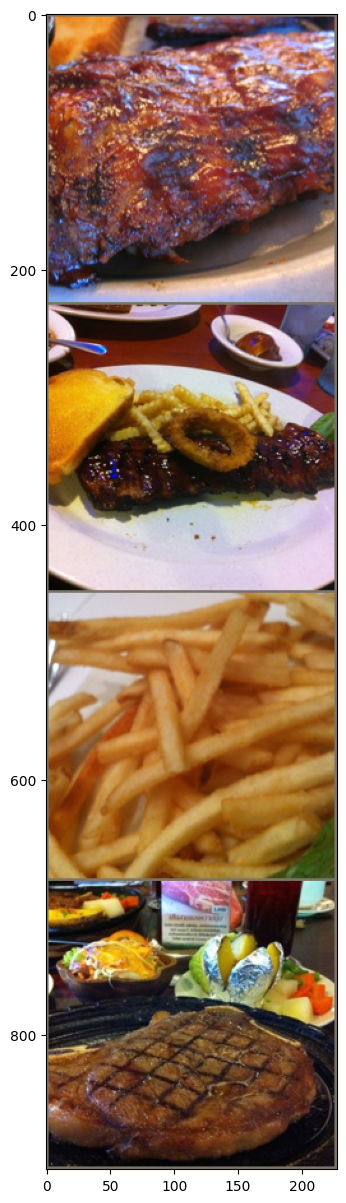

['baby_back_ribs', 'baby_back_ribs', 'french_fries', 'prime_rib']


In [14]:
from run_experiment import load_preferences, load_responses, id_to_class_map

experiment_output = load_responses("ALL_264_results_2024-05-10_06-00-07.json")

# Pick the test of interest by going through the results output json
test_id = 193 # set to the test of interest, consulting the ALL results JSON file to get the ID

test_details = experiment_output["Details by Test"][test_id - 1]

print("######################")
print("### Top Retrievals ###")
print("######################")
print(f"Preference: {test_details['preference']}")

descriptors = test_details["descriptors"]
our_top_k_info = test_details["top_4_ours"]

images_all = []
labels_all = []

for i, top_scorer in enumerate(our_top_k_info):
    sample_at = top_scorer["img_idx"]
    images, labels, idx = testloader.dataset[sample_at]

    images_all.append(images)
    labels_all.append(labels)

    print(f"\n{i}. Average Score", top_scorer["avg_score"])
    for j, attr in enumerate(descriptors):
        print(f"Score \'{descriptors[j]}\' = {top_scorer['scores_by_descriptor'][j]}")

# show images
plt.rcParams["figure.figsize"] = (20,15)
imshow(torchvision.utils.make_grid(images_all, 1))
print([id_to_class_map[label] for label in labels_all])